In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle

In [2]:
log = pm4py.read_xes('./BPI_Challenge_2012.xes.gz')
df = pm4py.convert_to_dataframe(log)
244190*0.3

73257.0

In [142]:

print('DataFrame size: {}'.format(len(df)))
print('DataFrame without nulls size: {}'.format(len(df.dropna())))

DataFrame size: 262200
DataFrame without nulls size: 244190


In [143]:
df.dropna(inplace=True)
df.describe()

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
count,244190,244190,244190,244190,244190,244190,244190
unique,68,3,24,230197,13087,13087,631
top,112,COMPLETE,W_Completeren aanvraag,2012-01-17 10:11:21.961000+01:00,2011-12-22 21:51:37.590000+01:00,195247,5000
freq,45687,156364,48372,4,168,168,30855


In [3]:
dftrain = df.iloc[:73257]
dftest = df.iloc[73257:]

In [48]:
dftraing = df.groupby(by='concept:name')
dftraing.describe()

org:resource                      \
                                      count unique    top  freq   
concept:name                                                      
A_ACCEPTED                             3655     51  11169   192   
A_ACTIVATED                            1548      9  10138   460   
A_APPROVED                             1548      9  10138   460   
A_CANCELLED                            1997     56    112   719   
A_DECLINED                             5604     55    112  2553   
A_FINALIZED                            3581     51  11169   188   
A_PARTLYSUBMITTED                      9547      1    112  9547   
A_PREACCEPTED                          5321     47    112  3461   
A_REGISTERED                           1548      9  10138   460   
A_SUBMITTED                            9547      1    112  9547   
O_ACCEPTED                             1547      8  10138   460   
O_CANCELLED                            2653     57    112   395   
O_CREATED                              5097     56  11169   233   
O_DECLINED                              569     37  10609   145   
O_SELECTED                             5097     56  11169   233   
O_SENT                                 5097     56  11169   233   
O_SENT_BACK                            2441     24  11259   788   
W_Afhandelen leads                    11380     47    112  3484   
W_Beoordelen fraude                     481     18  10188   292   
W_Completeren aanvraag                36951     51    112  3462   
W_Nabellen incomplete dossiers        17493     50  10913  1192   
W_Nabellen offertes                   33572     50  11119  1800   
W_Valideren aanvraag                  14902     52  10609  2479   
W_Wijzigen contractgegevens               6      3  11019     3   

                               lifecycle:transition                          \
                                              count unique       top   freq   
concept:name                                                                  
A_ACCEPTED                                     3655      1  COMPLETE   3655   
A_ACTIVATED                                    1548      1  COMPLETE   1548   
A_APPROVED                                     1548      1  COMPLETE   1548   
A_CANCELLED                                    1997      1  COMPLETE   1997   
A_DECLINED                                     5604      1  COMPLETE   5604   
A_FINALIZED                                    3581      1  COMPLETE   3581   
A_PARTLYSUBMITTED                              9547      1  COMPLETE   9547   
A_PREACCEPTED                                  5321      1  COMPLETE   5321   
A_REGISTERED                                   1548      1  COMPLETE   1548   
A_SUBMITTED                                    9547      1  COMPLETE   9547   
O_ACCEPTED                                     1547      1  COMPLETE   1547   
O_CANCELLED                                    2653      1  COMPLETE   2653   
O_CREATED                                      5097      1  COMPLETE   5097   
O_DECLINED                                      569      1  COMPLETE    569   
O_SELECTED                                     5097      1  COMPLETE   5097   
O_SENT                                         5097      1  COMPLETE   5097   
O_SENT_BACK                                    2441      1  COMPLETE   2441   
W_Afhandelen leads                            11380      3     START   3935   
W_Beoordelen fraude                             481      3     START    195   
W_Completeren aanvraag                        36951      3  COMPLETE  16058   
W_Nabellen incomplete dossiers                17493      3  COMPLETE   7886   
W_Nabellen offertes                           33572      3  COMPLETE  14799   
W_Valideren aanvraag                          14902      3  COMPLETE   5691   
W_Wijzigen contractgegevens                       6      1  SCHEDULE      6   

                               time:timestamp         ...  \
                          

In [144]:
case = 'blib'
first_item = []
for index, row in df.iterrows():
    if case != row['case:concept:name']:
        case = row['case:concept:name']
        task = row['concept:name']
        first_item.append(task)
print(Counter(first_item))

Counter({'A_SUBMITTED': 13087})


In [145]:
Counter(first_item)

Counter({'A_SUBMITTED': 13087})

In [8]:

def nth_most_common(w, n):
    sort = dict(sorted(Counter(w).items(), key=lambda item: item[1]))
    return str(list(sort)[-n])

In [9]:
def get_max(df, task):
    previous = 'blibs'
    empty = []
    case = 'blib'
    for index, row in df.iterrows():
        t = row['concept:name']
        c = row['case:concept:name']
        if (case == c) & (previous == task):
            empty.append(t)
        case = c
        previous = t
    return nth_most_common(empty, 1)


In [10]:
#get_max('A_ACCEPTED')

In [11]:
caselist = list(df['concept:name'].unique())

In [14]:
next_common_train = {}
for value in caselist:
    next_common_train[value] = get_max(task=value, df=dftrain)

In [17]:

next_common_train

{'A_SUBMITTED': 'A_PARTLYSUBMITTED',
 'A_PARTLYSUBMITTED': 'A_PREACCEPTED',
 'A_PREACCEPTED': 'W_Completeren aanvraag',
 'W_Completeren aanvraag': 'W_Completeren aanvraag',
 'A_ACCEPTED': 'O_SELECTED',
 'O_SELECTED': 'A_FINALIZED',
 'A_FINALIZED': 'O_CREATED',
 'O_CREATED': 'O_SENT',
 'O_SENT': 'W_Nabellen offertes',
 'W_Nabellen offertes': 'W_Nabellen offertes',
 'O_SENT_BACK': 'W_Valideren aanvraag',
 'W_Valideren aanvraag': 'W_Nabellen incomplete dossiers',
 'A_REGISTERED': 'W_Valideren aanvraag',
 'A_APPROVED': 'A_ACTIVATED',
 'O_ACCEPTED': 'A_REGISTERED',
 'A_ACTIVATED': 'W_Valideren aanvraag',
 'O_CANCELLED': 'O_CREATED',
 'W_Wijzigen contractgegevens': 'W_Wijzigen contractgegevens',
 'A_DECLINED': 'W_Afhandelen leads',
 'A_CANCELLED': 'O_CANCELLED',
 'W_Afhandelen leads': 'W_Afhandelen leads',
 'O_DECLINED': 'A_DECLINED',
 'W_Nabellen incomplete dossiers': 'W_Nabellen incomplete dossiers',
 'W_Beoordelen fraude': 'W_Beoordelen fraude'}

In [29]:
with open('next_common_event.pkl', 'wb') as f:
    pickle.dump(a, f)

In [30]:
with open('next_common_event.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [31]:
loaded_dict

[['A_SUBMITTED', '0 days 00:00:00.581691655'],
 ['A_PARTLYSUBMITTED', '0 days 01:01:20.356231880'],
 ['A_PREACCEPTED', '0 days 02:04:54.228496869'],
 ['W_Completeren aanvraag', '0 days 08:40:17.229487175'],
 ['A_ACCEPTED', '0 days 08:00:42.411919642'],
 ['O_SELECTED', '0 days 07:12:11.466512821'],
 ['A_FINALIZED', '0 days 06:43:09.900357195'],
 ['O_CREATED', '0 days 06:08:28.321527951'],
 ['O_SENT', '0 days 10:40:10.900425471'],
 ['W_Nabellen offertes', '0 days 18:40:50.682267246'],
 ['O_SENT_BACK', '0 days 19:40:24.803281383'],
 ['W_Valideren aanvraag', '0 days 18:40:09.228862896'],
 ['A_REGISTERED', '0 days 16:10:59.567745959'],
 ['A_APPROVED', '0 days 15:00:13.220079862'],
 ['O_ACCEPTED', '0 days 13:58:37.092804743'],
 ['A_ACTIVATED', '0 days 10:37:04.191335731'],
 ['O_CANCELLED', '0 days 07:06:06.679006013'],
 ['A_DECLINED', '0 days 05:10:39.946601047'],
 ['A_CANCELLED', '0 days 00:01:54.501236994'],
 ['W_Afhandelen leads', '0 days 00:03:03.999699108'],
 ['O_DECLINED', '-1 days +23

In [21]:
a=[["A_SUBMITTED", "0 days 00:00:00.581691655"],["A_PARTLYSUBMITTED", "0 days 01:01:20.356231880"],["A_PREACCEPTED", "0 days 02:04:54.228496869"],
["W_Completeren aanvraag","0 days 08:40:17.229487175"],["A_ACCEPTED","0 days 08:00:42.411919642"],["O_SELECTED","0 days 07:12:11.466512821"],
["A_FINALIZED","0 days 06:43:09.900357195"],['O_CREATED', '0 days 06:08:28.321527951'],["O_SENT", "0 days 10:40:10.900425471"],
["W_Nabellen offertes","0 days 18:40:50.682267246"],["O_SENT_BACK","0 days 19:40:24.803281383"],["W_Valideren aanvraag", "0 days 18:40:09.228862896"],
["A_REGISTERED","0 days 16:10:59.567745959"],["A_APPROVED","0 days 15:00:13.220079862"],["O_ACCEPTED","0 days 13:58:37.092804743"],
["A_ACTIVATED", "0 days 10:37:04.191335731"],["O_CANCELLED", "0 days 07:06:06.679006013"],["A_DECLINED","0 days 05:10:39.946601047"],
["A_CANCELLED", "0 days 00:01:54.501236994"],["W_Afhandelen leads", "0 days 00:03:03.999699108"],["O_DECLINED", "-1 days +23:03:35.456204528"],
["W_Nabellen incomplete dossiers", "0 days 00:00:37.705275266"],["W_Beoordelen fraude", "0 days 00:01:20.024146315"]]

In [22]:
d = {}
for value in a:
    d[value[0]] = value[1]

d

{'A_SUBMITTED': '0 days 00:00:00.581691655',
 'A_PARTLYSUBMITTED': '0 days 01:01:20.356231880',
 'A_PREACCEPTED': '0 days 02:04:54.228496869',
 'W_Completeren aanvraag': '0 days 08:40:17.229487175',
 'A_ACCEPTED': '0 days 08:00:42.411919642',
 'O_SELECTED': '0 days 07:12:11.466512821',
 'A_FINALIZED': '0 days 06:43:09.900357195',
 'O_CREATED': '0 days 06:08:28.321527951',
 'O_SENT': '0 days 10:40:10.900425471',
 'W_Nabellen offertes': '0 days 18:40:50.682267246',
 'O_SENT_BACK': '0 days 19:40:24.803281383',
 'W_Valideren aanvraag': '0 days 18:40:09.228862896',
 'A_REGISTERED': '0 days 16:10:59.567745959',
 'A_APPROVED': '0 days 15:00:13.220079862',
 'O_ACCEPTED': '0 days 13:58:37.092804743',
 'A_ACTIVATED': '0 days 10:37:04.191335731',
 'O_CANCELLED': '0 days 07:06:06.679006013',
 'A_DECLINED': '0 days 05:10:39.946601047',
 'A_CANCELLED': '0 days 00:01:54.501236994',
 'W_Afhandelen leads': '0 days 00:03:03.999699108',
 'O_DECLINED': '-1 days +23:03:35.456204528',
 'W_Nabellen incomplet

In [24]:
df['next_event'] = df['concept:name'].map(next_common)

<ipython-input-24-03da610c0014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['next_event'] = dftest['concept:name'].map(next_common_train)


In [158]:
df['time_until_next'] = df['concept:name'].map(d)

In [52]:
df = dftest
#df.iloc[-100:]

In [33]:
df['real_next'] = df['concept:name'].shift(-1)
df['next_case'] = df['case:concept:name'].shift(-1)
df2 = df.drop(df[df['case:concept:name'] != df['next_case']].index)

<ipython-input-33-1158297d1677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_next'] = df['concept:name'].shift(-1)
<ipython-input-33-1158297d1677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_case'] = df['case:concept:name'].shift(-1)


In [51]:
#df2.iloc[30:50]

In [35]:
same=0
diff = 0
for value, row in df2.iterrows():
    if row['next_event'] == row['real_next']:
        same += 1
    else: diff += 1

In [36]:
same

118265

In [37]:
diff

61130

In [38]:
accuracy = same / (diff+same) *100

In [39]:
accuracy

65.9243568661334

In [43]:
numbers = {}
i = 0
for value in caselist:
    numbers[value] = i
    i +=1 
numbers

{'A_SUBMITTED': 0,
 'A_PARTLYSUBMITTED': 1,
 'A_PREACCEPTED': 2,
 'W_Completeren aanvraag': 3,
 'A_ACCEPTED': 4,
 'O_SELECTED': 5,
 'A_FINALIZED': 6,
 'O_CREATED': 7,
 'O_SENT': 8,
 'W_Nabellen offertes': 9,
 'O_SENT_BACK': 10,
 'W_Valideren aanvraag': 11,
 'A_REGISTERED': 12,
 'A_APPROVED': 13,
 'O_ACCEPTED': 14,
 'A_ACTIVATED': 15,
 'O_CANCELLED': 16,
 'W_Wijzigen contractgegevens': 17,
 'A_DECLINED': 18,
 'A_CANCELLED': 19,
 'W_Afhandelen leads': 20,
 'O_DECLINED': 21,
 'W_Nabellen incomplete dossiers': 22,
 'W_Beoordelen fraude': 23}

<AxesSubplot:>

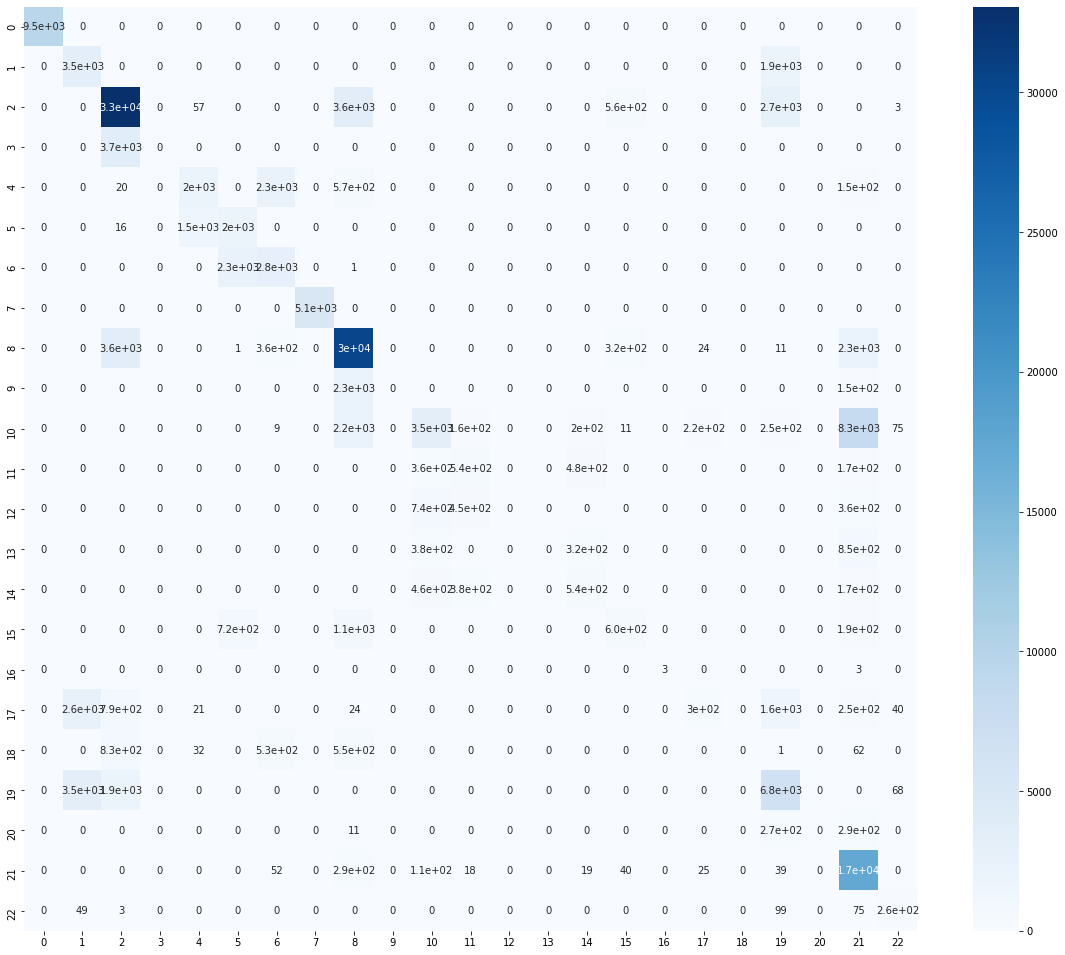

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
df.dropna(inplace=True)
cf_matrix = confusion_matrix(df2['real_next'].map(numbers), df2['next_event'].map(numbers))
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)

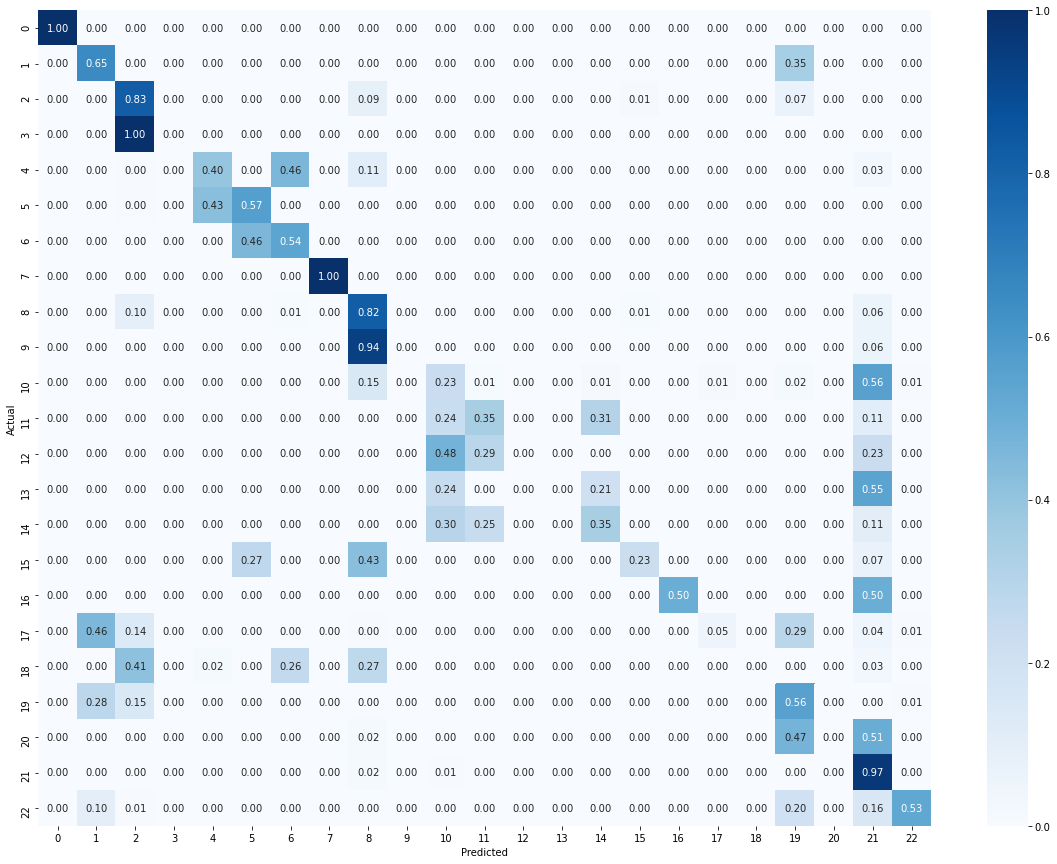

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test = df2['real_next'].map(numbers)
y_pred = df2['next_event'].map(numbers)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)